In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

# Set up the styling
sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

In [2]:
from gpudrive.utils.diversity import compare_agent_types

# Load the saved DataFrame
df = pd.read_csv("/home/emerge/gpudrive/agent_type_comparison_data.csv")

results = compare_agent_types(df)


=== Agent Type Comparison ===

Policy Entropy by Agent Type (higher = more uncertain):
agent_type
Risk-averse    2.230663
Nominal        1.935405
Aggressive     1.706336
Name: mean, dtype: float64

Average Log Probability (higher = more confident):
agent_type
Aggressive    -1.715222
Nominal       -1.939547
Risk-averse   -2.238968
Name: logprob, dtype: float64

Average Acceleration by Agent Type:
agent_type
Aggressive     3.117953
Nominal        2.036616
Risk-averse    0.085136
Name: acceleration, dtype: float64

Average Steering by Agent Type (absolute value - measures turning intensity):
agent_type
Risk-averse    2.363364
Nominal        2.156945
Aggressive     2.056634
dtype: float64

Average Goal Achievement Rate by Agent Type:
agent_type
Aggressive     1.000000
Nominal        0.966185
Risk-averse    0.756087
Name: frac_goal_achieved, dtype: float64

Average Collision Rate by Agent Type:
agent_type
Nominal        0.132341
Aggressive     0.110032
Risk-averse    0.090811
Name: frac_co

In [3]:
results.keys()

dict_keys(['acceleration_distribution', 'steering_distribution', 'entropy_stats', 'action_diversity', 'avg_logprob', 'time_series', 'goal_rate', 'collision_rate'])

In [4]:
results['entropy_stats']

,mean,std,min,max
agent_type,,,,
Aggressive,1.706336,0.702564,0.000793,3.484450
Nominal,1.935405,0.737693,0.001746,3.495515
Risk-averse,2.230663,0.685508,0.014702,3.733659


In [5]:
%matplotlib inline



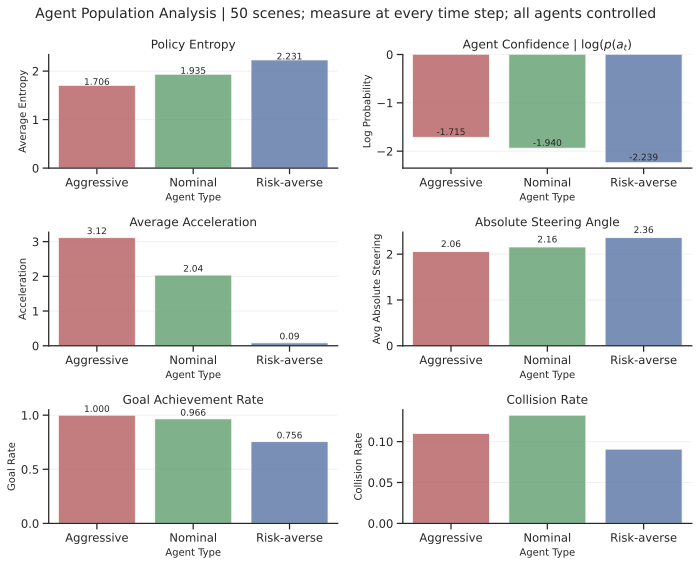

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a consistent color map for agent types
agent_colors = {
    'Aggressive': 'r',
    'Nominal': 'g',
    'Risk-averse': 'b'
}

# Define the consistent order of agent types (Nominal in the middle)
agent_order = ['Aggressive', 'Nominal', 'Risk-averse']

# Create figure with subplots - 3x2 to include acceleration and steering
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
fig.suptitle('Agent Population Analysis | 50 scenes; measure at every time step; all agents controlled', fontsize=14, y=0.98)

# 1. Policy Entropy by Agent Type (top left)
entropy_df = pd.DataFrame({
    'agent_type': results['entropy_stats'].index, 
    'entropy': results['entropy_stats']['mean'].values
})
# Reorder according to our defined order instead of sorting
entropy_df = entropy_df.set_index('agent_type').reindex(agent_order).reset_index()

colors = [agent_colors[agent] for agent in entropy_df['agent_type']]
sns.barplot(x='agent_type', y='entropy', data=entropy_df, 
            palette=colors, alpha=0.8, ax=axes[0, 0])
axes[0, 0].set_title('Policy Entropy', fontsize=12)
axes[0, 0].set_ylabel('Average Entropy', fontsize=10)
axes[0, 0].set_xlabel('Agent Type', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, row in enumerate(entropy_df.itertuples()):
    axes[0, 0].text(i, row.entropy + 0.01, f'{row.entropy:.3f}', 
                   ha='center', fontsize=9)

# 2. Agent Confidence via Log Probability (top right)
logprob_df = pd.DataFrame({'agent_type': results['avg_logprob'].index, 
                           'logprob': results['avg_logprob'].values})
# Reorder according to our defined order
logprob_df = logprob_df.set_index('agent_type').reindex(agent_order).reset_index()

colors = [agent_colors[agent] for agent in logprob_df['agent_type']]
sns.barplot(x='agent_type', y='logprob', data=logprob_df, 
            palette=colors, alpha=0.8, ax=axes[0, 1])
axes[0, 1].set_title(f'Agent Confidence | $\log(p(a_t)$', fontsize=12)
axes[0, 1].set_ylabel('Log Probability', fontsize=10)
axes[0, 1].set_xlabel('Agent Type', fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, row in enumerate(logprob_df.itertuples()):
    y_offset = 0.05 if row.logprob < 0 else -0.05
    axes[0, 1].text(i, row.logprob + y_offset, f'{row.logprob:.3f}', 
                   ha='center', fontsize=9)

# 3. Average Acceleration by Agent Type (middle left)
accel_df = df.groupby('agent_type')['acceleration'].mean().reset_index()
# Reorder according to our defined order
accel_df = accel_df.set_index('agent_type').reindex(agent_order).reset_index()

colors = [agent_colors[agent] for agent in accel_df['agent_type']]
sns.barplot(x='agent_type', y='acceleration', data=accel_df, 
            palette=colors, alpha=0.8, ax=axes[1, 0])
axes[1, 0].set_title('Average Acceleration', fontsize=12)
axes[1, 0].set_ylabel('Acceleration', fontsize=10)
axes[1, 0].set_xlabel('Agent Type', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, row in enumerate(accel_df.itertuples()):
    axes[1, 0].text(i, row.acceleration + 0.1, f'{row.acceleration:.2f}', 
                   ha='center', fontsize=9)

# 4. Average Steering by Agent Type (middle right)
# Calculate average absolute steering angle
steering_df = df.groupby('agent_type').apply(lambda x: abs(x['steering']).mean()).reset_index()
steering_df.columns = ['agent_type', 'steering']
# Reorder according to our defined order
steering_df = steering_df.set_index('agent_type').reindex(agent_order).reset_index()

colors = [agent_colors[agent] for agent in steering_df['agent_type']]
sns.barplot(x='agent_type', y='steering', data=steering_df, 
            palette=colors, alpha=0.8, ax=axes[1, 1])
axes[1, 1].set_title('Absolute Steering Angle', fontsize=12)
axes[1, 1].set_ylabel('Avg Absolute Steering', fontsize=10)
axes[1, 1].set_xlabel('Agent Type', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, row in enumerate(steering_df.itertuples()):
    axes[1, 1].text(i, row.steering + 0.1, f'{row.steering:.2f}', 
                   ha='center', fontsize=9)

# 5. Goal Achievement Rate (bottom left)
goal_df = pd.DataFrame({
    'agent_type': results['goal_rate'].index,
    'goal_rate': results['goal_rate'].values
})
# Reorder according to our defined order
goal_df = goal_df.set_index('agent_type').reindex(agent_order).reset_index()

colors = [agent_colors[agent] for agent in goal_df['agent_type']]
sns.barplot(x='agent_type', y='goal_rate', data=goal_df, 
            palette=colors, alpha=0.8, ax=axes[2, 0])
axes[2, 0].set_title('Goal Achievement Rate', fontsize=12)
axes[2, 0].set_ylabel('Goal Rate', fontsize=10)
axes[2, 0].set_xlabel('Agent Type', fontsize=10)
axes[2, 0].grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, row in enumerate(goal_df.itertuples()):
    axes[2, 0].text(i, row.goal_rate + 0.03, f'{row.goal_rate:.3f}', 
                    ha='center', fontsize=9)


# 6. Collision Rate (bottom right)

collision_df = pd.DataFrame({
    'agent_type': results['collision_rate'].index,
    'collision_rate': results['collision_rate'].values
})
# Reorder according to our defined order
collision_df = collision_df.set_index('agent_type').reindex(agent_order).reset_index()

colors = [agent_colors[agent] for agent in collision_df['agent_type']]
sns.barplot(x='agent_type', y='collision_rate', data=collision_df, 
            palette=colors, alpha=0.8, ax=axes[2, 1])
axes[2, 1].set_title('Collision Rate', fontsize=12)
axes[2, 1].set_ylabel('Collision Rate', fontsize=10)
axes[2, 1].set_xlabel('Agent Type', fontsize=10)
axes[2, 1].grid(axis='y', alpha=0.3)

# Adjust layout
plt.tight_layout()
#plt.subplots_adjust(top=0.95)
sns.despine()
plt.savefig('agent_population_analysis.pdf', dpi=300, bbox_inches='tight')